In [1]:
import numpy as np 
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.io import arff
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
from scipy.spatial.distance import pdist, cdist
from sklearn.metrics.pairwise import euclidean_distances, pairwise_distances
from sklearn.utils import check_random_state
from scipy.spatial import distance
from tslearn.soft_dtw_fast import *
from tslearn.cysax import *
from tslearn.metrics import dtw, dtw_path,dtw_path_from_metric,soft_dtw
from tslearn.utils import *


# Loading Training and Testing Data Source

In [2]:
data1 = arff.loadarff('/Users/arslanaliawan/Desktop/Pre-experiment/Multivariate_arff/CharacterTrajectories/CharacterTrajectoriesDimension1_TRAIN.arff')
data2 = arff.loadarff('/Users/arslanaliawan/Desktop/Pre-experiment/Multivariate_arff/CharacterTrajectories/CharacterTrajectoriesDimension2_TRAIN.arff')
data3 = arff.loadarff('/Users/arslanaliawan/Desktop/Pre-experiment/Multivariate_arff/CharacterTrajectories/CharacterTrajectoriesDimension3_TRAIN.arff')

Test_data1 = arff.loadarff('/Users/arslanaliawan/Desktop/Pre-experiment/Multivariate_arff/CharacterTrajectories/CharacterTrajectoriesDimension1_TEST.arff')
Test_data2 = arff.loadarff('/Users/arslanaliawan/Desktop/Pre-experiment/Multivariate_arff/CharacterTrajectories/CharacterTrajectoriesDimension2_TEST.arff')
Test_data3 = arff.loadarff('/Users/arslanaliawan/Desktop/Pre-experiment/Multivariate_arff/CharacterTrajectories/CharacterTrajectoriesDimension3_TEST.arff')

In [3]:
df_D1 = pd.DataFrame(data1[0])
df_D2 = pd.DataFrame(data2[0])
df_D3 = pd.DataFrame(data3[0])

Test_df_D1 = pd.DataFrame(Test_data1[0])
Test_df_D2 = pd.DataFrame(Test_data2[0])
Test_df_D3 = pd.DataFrame(Test_data3[0])

## Make Over the data, as desired

In [4]:
df_D1 =df_D1.apply(lambda x : x.fillna(method='ffill'), axis=1) 
df_D2 =df_D2.apply(lambda x : x.fillna(method='ffill'), axis=1)
df_D3 =df_D3.apply(lambda x : x.fillna(method='ffill'), axis=1) 

Test_df_D1 =Test_df_D1.apply(lambda x : x.fillna(method='ffill'), axis=1) 
Test_df_D2 =Test_df_D2.apply(lambda x : x.fillna(method='ffill'), axis=1)
Test_df_D3 =Test_df_D3.apply(lambda x : x.fillna(method='ffill'), axis=1) 

In [5]:
df_D1 = df_D1.drop('target', axis=1)
df_D2 = df_D2.drop('target', axis=1)
df_D3 = df_D3.drop('target', axis=1)

Test_df_D1 = Test_df_D1.drop('target', axis=1)
Test_df_D2 = Test_df_D2.drop('target', axis=1)
Test_df_D3 = Test_df_D3.drop('target', axis=1)

In [6]:
Sort_Dim_1 = np.expand_dims(df_D1.values.reshape(-1),axis=1)
Sort_Dim_2 = np.expand_dims(df_D2.values.reshape(-1),axis=1)
Sort_Dim_3 = np.expand_dims(df_D3.values.reshape(-1),axis=1)

Sort_Test_Dim_1 = np.expand_dims(Test_df_D1.values.reshape(-1),axis=1)
Sort_Test_Dim_2 = np.expand_dims(Test_df_D2.values.reshape(-1),axis=1)
Sort_Test_Dim_3 = np.expand_dims(Test_df_D3.values.reshape(-1),axis=1)

In [7]:
Training_View = np.concatenate((Sort_Dim_1, Sort_Dim_2),axis=1)
Training_View = np.concatenate((Training_View, Sort_Dim_3),axis=1)

In [8]:
Training_View.shape

(258804, 3)

In [9]:
Testing_View = np.concatenate((Sort_Test_Dim_1, Sort_Test_Dim_2),axis=1)
Testing_View = np.concatenate((Testing_View, Sort_Test_Dim_3),axis=1)

In [10]:
finalarray_test_data = Testing_View[:][0:182]

In [11]:
finalarray_test_data.shape

(182, 3)

## Initializing the data

In [12]:
Total_rows = 258804
Sample_Percentage = 0
Number_of_run= 0
Length_RTS = 0
Training_Results_List = []
Testing_Results_List = []
Starting_point = Testing_View[:][0:1]
End_point = Testing_View[:][181:182]

In [13]:
def Calculate_Percentage(Sample_Percentage):
    Refining_Percentage= Total_rows * (Sample_Percentage/100)
    Refining_Percentage = round(Refining_Percentage)   
    return Refining_Percentage

## Random TS 

In [14]:
def Random_Part(Refining_Percentage,Length_RTS):
    Sub_Sampling = Training_View[:][0:Refining_Percentage]
    number_of_rows = Sub_Sampling.shape[0]
    random_indices = np.random.choice(number_of_rows, size=Length_RTS, replace=False)
    random_rows = Sub_Sampling[random_indices, :]
    return random_rows
    

In [15]:
def Adding_start_end_point(random_rows):
    Output_TS = np.concatenate((Starting_point, random_rows),axis=0)
    Output_TS = np.concatenate((Output_TS, End_point),axis=0)
    return Output_TS

In [16]:
def Calculate_Random_DTW(Output_TS):
    path, dist = dtw_path(finalarray_test_data, Output_TS)
    if(dist>0):
        Training_Results_List.append(dist)            

In [17]:
Refining_Percentage = Calculate_Percentage(25)
random_rows = Random_Part(Refining_Percentage,180)
Output_TS = Adding_start_end_point(random_rows)
Calculate_Random_DTW(Output_TS)

In [18]:
Training_Results_List

[23.74181364438189]

In [19]:
Refining_Percentage = Calculate_Percentage(50)
random_rows = Random_Part(Refining_Percentage,180)
Output_TS = Adding_start_end_point(random_rows)
Calculate_Random_DTW(Output_TS)
Training_Results_List

[23.74181364438189, 23.47224115283076]

In [20]:
Refining_Percentage = Calculate_Percentage(75)
random_rows = Random_Part(Refining_Percentage,180)
Output_TS = Adding_start_end_point(random_rows)
Calculate_Random_DTW(Output_TS)
Training_Results_List

[23.74181364438189, 23.47224115283076, 23.428647650493264]

In [21]:
Refining_Percentage = Calculate_Percentage(100)
random_rows = Random_Part(Refining_Percentage,180)
Output_TS = Adding_start_end_point(random_rows)
Calculate_Random_DTW(Output_TS)
Training_Results_List

[23.74181364438189, 23.47224115283076, 23.428647650493264, 23.248579045821813]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f898a98d2d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f898a9b37d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f898a98d290>],
 'medians': [<matplotlib.lines.Line2D at 0x7f89a4a99850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f898a687750>],
 'means': []}

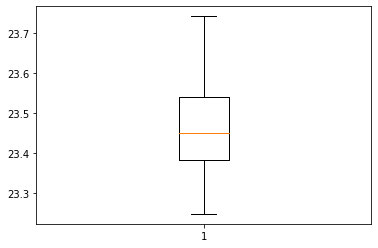

In [22]:
plt.boxplot(Training_Results_List, notch=None, vert=None, patch_artist=None, widths=None)

# Pseudo TS

In [ ]:
Refining_Percentage = Calculate_Percentage(25)
# random_rows = Random_Part(Refining_Percentage,180)
# Output_TS = Adding_start_end_point(random_rows)
# Calculate_Random_DTW(Output_TS)

In [23]:
Sub_Sampling_PTS = Testing_View[:][1:181]

In [24]:
Pseudo_TS = Sub_Sampling_PTS
PTS = np.concatenate((Starting_point, Pseudo_TS),axis=0)
PTS = np.concatenate((PTS, End_point),axis=0)

### Similarity Matrix

In [47]:
def generate_similarity_matrix(PTS):
    ED_Matrix = distance.cdist(PTS, PTS, 'euclidean')
    return ED_Matrix

In [56]:
def generate_graph(similarity_output):
    G = nx.from_numpy_matrix(similarity_output, create_using=nx.Graph)
    layout = nx.spring_layout(G)
    sizes = len(similarity_output)
    nx.draw(G, layout, with_labels=True, node_size=sizes)
    labels = nx.get_edge_attributes(G, "weight")
    output = nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=labels)
    plt.show()
    return G

In [71]:
def generate_MST(G):
    layout = nx.spring_layout(G)
    T=nx.minimum_spanning_tree(G)
    nx.draw(T, layout, with_labels=True)
    weight = nx.get_edge_attributes(T, "weight")
    nx.draw_networkx(T, pos=layout, edge_labels=weight)
    return T,weight

In [72]:
def generate_Dijkstra(T,MST_output):
    Dij = nx.dijkstra_path(T,0,181,weight='MST_output')
    return Dij

In [79]:
def doing_miscellaneous_work(Dijkstra_output):
    a = []
    for x in range(len(Dijkstra_output)):
    
        Index = Dijkstra_output[x]
        a.append(list(PTS[Index]))
    P_TS = np.array(a)
    return P_TS

In [101]:
def generate_DTW_PTS(Miscellaneous_output):
    path, dist = dtw_path(finalarray_test_data, Miscellaneous_output)
    if(dist>0):
        Testing_Results_List.append(dist)     

In [62]:
similarity_output = generate_similarity_matrix(PTS) 

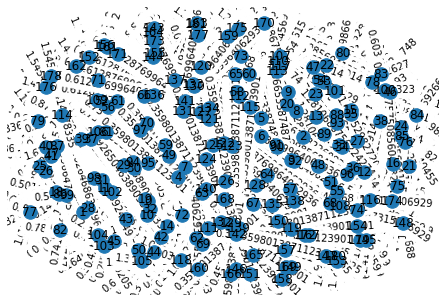

In [63]:
graph_output = generate_graph(similarity_output)

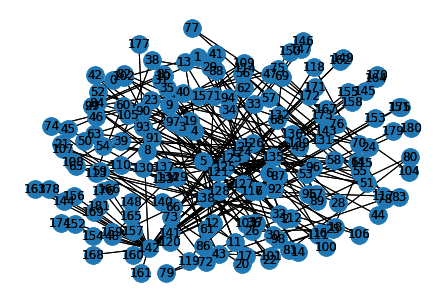

In [75]:
MST_output_1,MST_output_2 =  generate_MST(graph_output)

In [109]:
Dijkstra_output = generate_Dijkstra(MST_output_1,MST_output_2 )

In [110]:
Miscellaneous_output = doing_miscellaneous_work(Dijkstra_output)

In [111]:
generate_DTW_PTS(Miscellaneous_output)

In [112]:
Testing_Results_List

[9.343086602712134]